In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set_theme()

### Import Data

In [2]:
# data can be found at https://urban.jrc.ec.europa.eu/#/en/download
gdp = pd.read_csv('EUROSTAT_gdp.csv')
pop = pd.read_csv('JRC_ARDECO-DEMO_2020_population.csv')

In [3]:
gdp.head()

,NUTS_CODE,NUTS_LEVEL,UNIT,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,AT,0,MIO_EUR,213606.48,220525.08,226735.22,231862.46,242348.26,254075.03,267824.45,...,293761.91,288044.02,295896.64,310128.66,318653.04,323910.20,333146.07,344258.51,356237.59,369899.17
1,BE,0,MIO_EUR,258222.00,265788.40,275065.10,282636.50,298710.80,311480.80,326662.10,...,354065.90,348781.10,365100.50,379106.30,387500.10,392339.80,400086.60,411010.20,424660.30,439051.90
2,BG,0,MIO_EUR,14305.83,15784.30,17343.64,18654.00,20931.96,23852.65,27210.91,...,37200.05,37317.66,38230.52,41292.04,41947.24,41858.11,42824.44,45288.46,48128.64,51663.02
3,CY,0,MIO_EUR,10804.59,11602.93,12082.95,12871.33,13937.98,15039.29,16263.84,...,19006.18,18673.53,19299.51,19730.98,19489.72,18140.49,17609.98,17746.02,18490.20,19570.92
4,CZ,0,MIO_EUR,66838.76,75387.72,87055.06,88249.14,96028.47,109627.66,123943.19,...,161313.12,148682.01,156718.24,164040.46,161434.33,157741.65,156659.97,168473.29,176370.13,191721.76


In [4]:
pop.head()

,NUTS_CODE,NUTS_LEVEL,UNIT,indic,1980,1981,1982,1983,1984,1985,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AT,0,KHAB,RNPTD,7549.430,7568.71,7574.140,7561.910,7561.430,7564.98,...,8426.31,8477.23,8543.93,8629.52,8739.81,8795.07,8837.71,8881.002,8923.662,8965.623
1,BE,0,KHAB,RNPTD,9859.000,9858.00,9856.000,9854.000,9855.000,9857.00,...,11067.80,11125.00,11179.80,11238.50,11295.00,11349.10,11403.70,11458.693,11516.607,11574.814
2,DE,0,KHAB,RNPTD,61566.000,61682.00,61638.000,61423.000,61175.000,61024.00,...,80426.00,80646.00,80983.00,81687.00,82349.00,82657.00,82906.00,83111.029,83283.544,83430.225
3,DK,0,KHAB,RNPTD,5124.000,5122.00,5118.000,5114.000,5111.000,5113.00,...,5591.00,5613.00,5643.00,5682.00,5729.00,5767.00,5794.00,5819.000,5843.000,5866.372
4,EL,0,KHAB,RNPTD,9642.505,9729.35,9789.513,9846.627,9895.801,9934.30,...,11045.04,10965.24,10892.37,10820.96,10775.99,10754.70,10727.56,10670.028,10610.462,10551.030


In [5]:
# note that units of gdp and population are MIO_EUR (million euros) and KHAB (thousand habitants)

### Merge dataframes for year 2017

In [6]:
df = gdp[['NUTS_CODE','2017']].merge(pop[['NUTS_CODE','2017']], on='NUTS_CODE')
df.head()

,NUTS_CODE,2017_x,2017_y
0,AT,369899.17,8795.07
1,BE,439051.90,11349.10
2,BG,51663.02,7075.95
3,CY,19570.92,859.52
4,CZ,191721.76,10589.53


In [7]:
df.shape

(34, 3)

In [8]:
# reassign column names
df.columns = ['Country', 'gdp_2017', 'pop_2017']
df.head()

,Country,gdp_2017,pop_2017
0,AT,369899.17,8795.07
1,BE,439051.90,11349.10
2,BG,51663.02,7075.95
3,CY,19570.92,859.52
4,CZ,191721.76,10589.53


### Remove NaNs

In [9]:
df.isna().sum()

Country     0
gdp_2017    1
pop_2017    0
dtype: int64

In [10]:
df[df['gdp_2017'].isna()]

,Country,gdp_2017,pop_2017
28,NO,NaN,5277.0


In [11]:
# We observe Norway has a missing GDP value so we will remove Norway from dataset

In [12]:
df = df.dropna()
df.head()

,Country,gdp_2017,pop_2017
0,AT,369899.17,8795.07
1,BE,439051.90,11349.10
2,BG,51663.02,7075.95
3,CY,19570.92,859.52
4,CZ,191721.76,10589.53


In [13]:
df.shape

(33, 3)

### Area Plots

In [14]:
def shade(data, feature, value):
    """
    This function will be called in the area_plot function. It is used to determine which shade of color
    will be used when plotting the area of the bar.
    """
    
    
    max_feat = data[feature].max()
    min_feat = data[feature].min()
    
    split_array = np.linspace(min_feat, max_feat, 6)
    
    if value <= split_array[1]:
        return .2
    
    if value > split_array[1] and value <= split_array[2]:
        return .4
    
    if value > split_array[2] and value <= split_array[3]:
        return .6
    
    if value > split_array[3] and value <= split_array[4]:
        return .8
    
    if value > split_array[4] and value <= split_array[5]:
        return 1

In [15]:
def draw_legend(data, feature):
    """
    Custom function to plot the legend on the area_plot function
    """
    
    max_feat = data[feature].max()
    min_feat = data[feature].min()
    split_array = np.linspace(min_feat, max_feat, 6)
    
    rect1 = patches.Rectangle((0,0),1,1,color='tab:blue', alpha=.2)
    rect2 = patches.Rectangle((0,0),1,1,color='tab:blue', alpha=.4)
    rect3 = patches.Rectangle((0,0),1,1,color='tab:blue', alpha=.6)
    rect4 = patches.Rectangle((0,0),1,1,color='tab:blue', alpha=.8)
    rect5 = patches.Rectangle((0,0),1,1,color='tab:blue', alpha=1)
    
    return ((rect1, rect2, rect3, rect4, rect5),
           (int(split_array[1]), 
            int(split_array[2]), 
            int(split_array[3]), 
            int(split_array[4]), 
            int(split_array[5])))

In [16]:
def area_plot(df, x_feat, y_feat):
    """
    This function takes a dataframe and 2 of its columns. The cumulative sum of the x_feature is plotted on the
    x-axis while the slope (y/x) is plotted on the y-axis. The area of each bar, corresponds to the y_feature.
    It's value is represented by the intensity of the shade.
    """
    
    fig = plt.figure(figsize=(16,8))

    data = df.copy()
    data['slope'] = data[y_feat]/data[x_feat]
    data = data.sort_values('slope', ascending=False)

    cum_sum = 0
    for index, row in data.iterrows():
        plt.bar(x=cum_sum, width=row[x_feat], height=row['slope'], 
                align='edge',
                color='tab:blue',
               alpha=shade(data, y_feat, row[y_feat]))
        
        plt.annotate(text=row['Country'], 
                     xy=(cum_sum + row[x_feat]/2, row['slope']), 
                     fontsize=10)
        
        cum_sum += row[x_feat]

    plt.legend(draw_legend(data, y_feat)[0], draw_legend(data, y_feat)[1], title=y_feat)
    plt.xlabel(f'Cumulative {x_feat}')
    plt.ylabel(f'{y_feat} / {x_feat}')
    plt.title(f'Cumulative Disitrbution of {x_feat} w.r.t {y_feat}')
    plt.show()

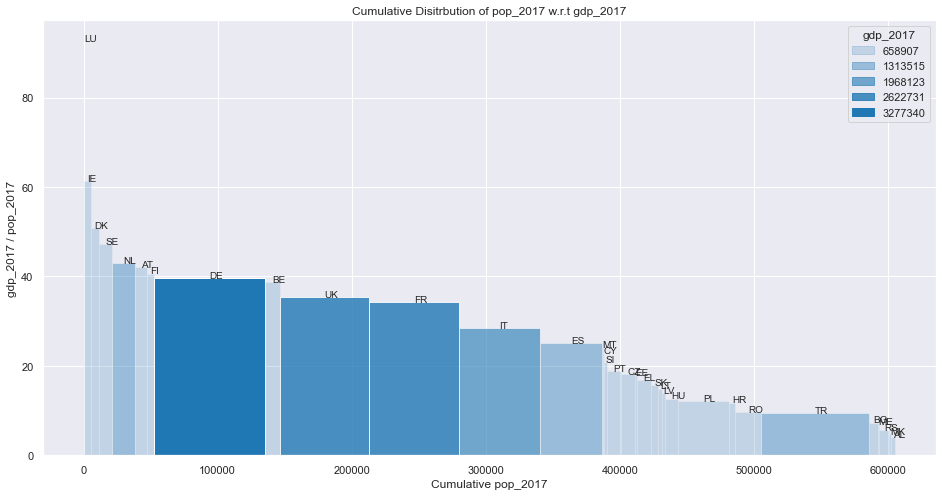

In [17]:
area_plot(df, 'pop_2017', 'gdp_2017')

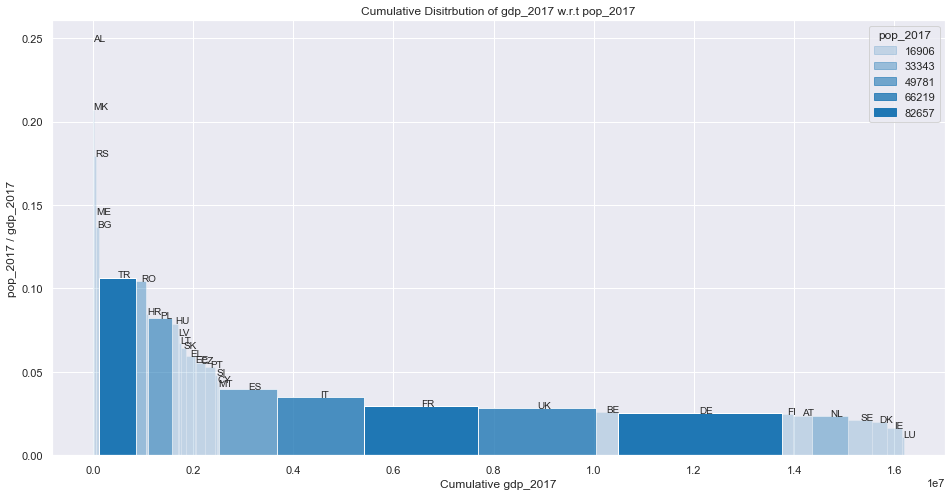

In [18]:
area_plot(df, 'gdp_2017', 'pop_2017')